In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import itertools

#resouce (https://www.kaggle.com/datasets/sazidthe1/sustainable-development-report?select=sdg_index_2000-2022.csv)
sdgsdf = pd.read_csv("sdg_index_2000-2022.csv")

sustain = pd.read_csv("sustainable_development_report_2023.csv")


edudf = pd.read_csv('world-education-data.csv')
edu_countries = edudf["country"].tolist()
edu_code = edudf["country_code"].tolist()

df4 = pd.read_csv("4- mismanaged-plastic-waste-per-capita.csv")

df4_countries = df4["Entity"].tolist()
df4_code = df4["Code"].tolist()

gdp = pd.read_csv('filtered_dfgdp_2000_2020.csv')
gdp_countries = gdp['Country Name'].tolist()
gdp_code = gdp["Code"].tolist()

In [2]:
'''
If you want to see the ranking, you can fill in 
 - the number of the yearin the first line(instead of 2020 below)
 - ascending = True to see the worst ranking
 - number in the "head(20)" at the very end to manipulate the number of countries shows 
 
 
america = america[america['year'] == 2020]
sorted_data = america.sort_values(by='goal_4_score', ascending=False)
print(sorted_data[['country', 'goal_4_score']].head(20))


This code is listed in each continent
'''

'\nIf you want to see the ranking, you can fill in \n - the number of the yearin the first line(instead of 2020 below)\n - ascending = True to see the worst ranking\n - number in the "head(20)" at the very end to manipulate the number of countries shows \n \n \namerica = america[america[\'year\'] == 2020]\nsorted_data = america.sort_values(by=\'goal_4_score\', ascending=False)\nprint(sorted_data[[\'country\', \'goal_4_score\']].head(20))\n\n\nThis code is listed in each continent\n'

In [3]:
#Matched countries among 3 datasets
# Asia
asia = [
    'China',
    'India'
]

# Asia excl. China and India
asia_excl_china_india = [
    'Bangladesh',
    'Brunei',
    'Cambodia',
    'Hong Kong',
    'Indonesia',
    'Japan',
    'Kazakhstan',
    'Korea, Rep.',
    'Malaysia',
    'Maldives',
    'Myanmar',
    'North Korea',
    'Pakistan',
    'Philippines',
    'Singapore',
    'Sri Lanka',
    'Thailand',
    'Vietnam'
]

# Oceania
oceania = [
    'Australia',
    'Fiji',
    'Kiribati',
    'Marshall Islands',
    'New Zealand',
    'Palau',
    'Papua New Guinea',
    'Samoa',
    'Solomon Islands',
    'Tonga',
    'Timor-Leste'
]

# USA
usa = [
    'United States'
]

# America excl. USA
america_excl_usa = [
    'Antigua and Barbuda',
    'Argentina',
    'Barbados',
    'Belize',
    'Brazil',
    'Canada',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Dominica',
    'Dominican Republic',
    'Ecuador',
    'El Salvador',
    'Grenada',
    'Guatemala',
    'Guyana',
    'Honduras',
    'Jamaica',
    'Mexico',
    'Panama',
    'Peru',
    'Puerto Rico',
    'Suriname',
    'Trinidad and Tobago',
    'Uruguay',
    'Venezuela',
    'Bahamas',
    'Haiti',
    'Nicaragua',
    'Saint Kitts and Nevis',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Sao Tome and Principe'
]

# MENA (Middle East and North Africa)
mena = [
    'Algeria',
    'Bahrain',
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Libya',
    'Morocco',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Sudan',
    'Syria',
    'Tunisia',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

# Sub-Saharan Africa
sub_saharan_africa = [
    'Benin',
    'Burkina Faso',
    'Cameroon',
    'Gabon',
    'Ghana',
    'Kenya',
    'Lesotho',
    'Liberia',
    'Madagascar',
    'Mauritania',
    'Nigeria',
    'Senegal',
    'Seychelles',
    'Sierra Leone',
    'Somalia',
    'South Africa',
    'Togo',
    'Zimbabwe',
    'Angola',
    'Comoros',
    'Congo',
    'Ivory Coast',
    'Democratic Republic of the Congo',
    'Djibouti',
    'Equatorial Guinea',
    'Eritrea',
    'Gambia',
    'Guinea',
    'Guinea-Bissau',
    'Mozambique',
    'Namibia',
    'Tanzania'
]

# Europe
europe = [
    'Albania',
    'Belgium',
    'Bosnia and Herzegovina',
    'Bulgaria',
    'Croatia',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Georgia',
    'Germany',
    'Greece',
    'Iceland',
    'Ireland',
    'Italy',
    'Latvia',
    'Lithuania',
    'Malta',
    'Monaco',
    'Netherlands',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russia',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden',
    'Ukraine',
    'United Kingdom',
    'Montenegro'
]



In [4]:
sdgsdf

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,Zimbabwe,2018,55.9,26.4,46.6,39.8,57.9,76.7,51.6,...,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,ZWE,Zimbabwe,2019,53.7,21.4,46.0,40.6,60.6,77.0,51.3,...,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5
4137,ZWE,Zimbabwe,2020,54.3,20.1,47.2,41.5,62.0,77.0,51.1,...,62.9,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0
4138,ZWE,Zimbabwe,2021,54.8,20.8,48.4,41.9,62.5,77.1,51.1,...,63.1,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1


In [5]:

# Filter the data to include only rows where the 'year' is between 2000 and 2020
sdgs = sdgsdf[(sdgsdf['year'] >= 2000) & (sdgsdf['year'] <= 2020)]

# Optionally, save the filtered data to a new CSV file
sdgs.to_csv('filtered_dataset_2000_2020.csv', index=False)

# Show the first few rows of the filtered data
print(sdgs.head())

  country_code      country  year  sdg_index_score  goal_1_score  \
0          AFG  Afghanistan  2000             36.0          28.8   
1          AFG  Afghanistan  2001             36.3          28.8   
2          AFG  Afghanistan  2002             36.3          28.8   
3          AFG  Afghanistan  2003             36.7          28.8   
4          AFG  Afghanistan  2004             37.1          28.8   

   goal_2_score  goal_3_score  goal_4_score  goal_5_score  goal_6_score  ...  \
0          27.3          19.2           1.6          20.8          32.4  ...   
1          30.6          19.4           1.6          20.8          32.4  ...   
2          30.7          19.7           1.6          20.8          32.7  ...   
3          32.5          19.9           1.6          20.8          33.0  ...   
4          32.1          21.1           1.6          20.8          33.3  ...   

   goal_8_score  goal_9_score  goal_10_score  goal_11_score  goal_12_score  \
0          38.5           5.2   

In [6]:
sdgs

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,ZWE,Zimbabwe,2016,56.1,29.1,43.7,36.9,60.8,75.8,53.0,...,60.6,25.4,37.0,76.1,93.5,94.8,0.0,78.0,46.2,48.6
4134,ZWE,Zimbabwe,2017,56.4,27.6,46.4,38.5,59.6,77.2,52.8,...,63.6,25.7,32.4,75.7,94.5,94.9,0.0,78.0,44.9,51.9
4135,ZWE,Zimbabwe,2018,55.9,26.4,46.6,39.8,57.9,76.7,51.6,...,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,ZWE,Zimbabwe,2019,53.7,21.4,46.0,40.6,60.6,77.0,51.3,...,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5


In [7]:
sdgs_code = sdgs['country_code'].tolist()

In [8]:
#Number _2

mismatchcode_dfgdp_not_in_df4_2 = set(gdp_code) - set(df4_code)
mismatchcode_df4_not_in_dfgdp_2 = set(df4_code) - set(gdp_code)
mismatch_code1 = list(mismatchcode_dfgdp_not_in_df4_2)
mismatch_code2 = list(mismatchcode_df4_not_in_dfgdp_2)
mismatch_code1and2 = mismatch_code1 + mismatch_code2

#This is the cleaned country code

okcode = set(sdgs_code) - set(mismatch_code1and2)

# Convert the set to a list
list_okcode = list(okcode)

# Use len() to count the number of elements in the list
count_okcode = len(list_okcode)

# Print the results
print(list_okcode)
print(f"The number of the code that are not mismatching among 3 data frame is :", count_okcode)


['GTM', 'MLT', 'LBR', '_E_Euro_Asia', '_LIC', 'SAU', 'COD', 'KOR', 'IND', 'GAB', 'ZWE', 'KAZ', 'ESP', 'TUR', 'KHM', 'VNM', 'NIC', 'USA', 'MUS', 'AUS', 'RUS', 'SWE', 'CHN', 'THA', 'BHR', 'NLD', 'COM', 'ZAF', 'POL', 'BEN', 'DJI', 'ARE', 'LTU', 'DNK', 'MDG', 'SEN', 'BGD', '_MENA', 'ITA', 'LKA', 'CRI', 'ECU', 'SGP', 'EST', 'GMB', 'MNE', '_E_S_Asia', 'HND', '_Oceania', 'SOM', 'SLE', 'TGO', 'EGY', 'IRL', 'BRN', 'MOZ', 'GUY', 'BFA', 'LVA', 'GBR', 'URY', 'NGA', 'CPV', 'SDN', 'ISL', 'NAM', 'BEL', 'KEN', 'HTI', 'CHL', 'CIV', 'BGR', 'HRV', 'ARG', '_LIC_LMIC', 'PRT', 'BRB', 'TUN', 'BLZ', 'CMR', 'MDV', 'SYR', 'ROU', 'GEO', 'BRA', 'DOM', 'BHS', 'CYP', 'FIN', 'SVN', 'PAK', 'YEM', 'KWT', 'MYS', 'UKR', 'FRA', 'FJI', 'GHA', 'IRQ', 'NOR', 'COL', 'TZA', 'NZL', '_UMIC', 'JOR', 'QAT', '_LAC', 'LBN', 'VEN', 'ISR', 'PNG', 'PAN', 'DEU', '_LMIC', 'GIN', 'MEX', 'IRN', 'PHL', '_HIC', '_Africa', 'MAR', 'JAM', '_World', 'AGO', 'OMN', 'LSO', 'CAN', 'JPN', 'PER', '_SIDS', 'IDN', 'DZA', 'SUR', 'SVK', 'ALB', '_OECD', '

In [9]:
sdgs['country_code'] == 'KOR'

0       False
1       False
2       False
3       False
4       False
        ...  
4133    False
4134    False
4135    False
4136    False
4137    False
Name: country_code, Length: 3780, dtype: bool

In [10]:
sdgs_codef = sdgs[sdgs['country_code'].isin(sdgs_code)]
df = sdgs['country'].tolist()
print(df)

['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Angola', 'Argentina',

In [11]:
# Assuming 'sdgs' is your DataFrame and 'sdgs_code' is a list of country codes
sdgs_codef = sdgs[sdgs['country_code'].isin(sdgs_code)]

# Get unique country names (without duplication)
df = sdgs_codef['country'].unique()

# Optionally, if you want the result as a list
df_list = df.tolist()

print(df_list)


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'East and South Asia', 'Eastern Europe and Central Asia', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'High-income Countries', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Irel

In [12]:
sdgsuni=sdgs['country'].value_counts()

In [13]:
print(sdgsuni)

Afghanistan    21
Myanmar        21
Nepal          21
Netherlands    21
New Zealand    21
               ..
Germany        21
Ghana          21
Greece         21
Guatemala      21
Zimbabwe       21
Name: country, Length: 180, dtype: int64


In [14]:
print(f'Null values in goal 4 are :',sdgs['goal_4_score'].isnull().sum())
print(sdgs.columns)

Null values in goal 4 are : 0
Index(['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score',
       'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
       'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score',
       'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score',
       'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score'],
      dtype='object')


In [15]:
asiaex = sdgs[sdgs['country'].isin(asia_excl_china_india)]
asiaex

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
253,BGD,Bangladesh,2000,55.6,52.5,57.3,38.0,60.5,36.1,59.6,...,73.0,17.7,77.7,40.6,96.7,98.9,59.8,57.2,53.5,40.1
254,BGD,Bangladesh,2001,54.8,52.5,56.6,38.5,45.3,36.3,60.0,...,72.8,17.7,77.7,40.6,96.5,98.9,61.1,57.0,53.4,40.0
255,BGD,Bangladesh,2002,54.7,52.5,57.1,38.5,45.7,32.6,60.4,...,72.6,17.7,77.7,40.8,96.5,98.9,61.9,56.8,53.5,39.9
256,BGD,Bangladesh,2003,54.9,52.5,57.7,38.8,45.7,32.4,60.8,...,72.4,17.7,77.7,40.9,96.6,98.8,62.7,56.6,53.5,40.0
257,BGD,Bangladesh,2004,54.8,52.5,55.8,39.9,44.3,32.3,61.1,...,72.4,17.7,77.7,41.1,96.6,98.8,63.3,56.4,53.4,39.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,VNM,Vietnam,2016,70.5,93.2,69.7,68.8,98.0,71.1,71.9,...,75.2,41.2,72.1,74.3,89.6,94.1,48.6,48.0,57.5,55.4
4042,VNM,Vietnam,2017,70.9,93.9,70.5,68.9,98.2,71.2,72.5,...,74.5,42.5,72.1,74.9,89.5,93.9,47.7,47.8,58.5,56.4
4043,VNM,Vietnam,2018,71.3,94.5,71.7,66.6,97.5,71.1,73.1,...,76.2,50.0,70.4,82.6,89.2,93.0,47.6,42.0,59.5,57.2
4044,VNM,Vietnam,2019,71.4,95.5,72.2,68.5,97.9,71.3,73.7,...,75.6,50.4,70.4,83.0,89.1,91.9,47.4,41.8,60.4,56.8


/tmp/ipykernel_155/4092820589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asiaex['year'] = asiaex['year'].astype(int)


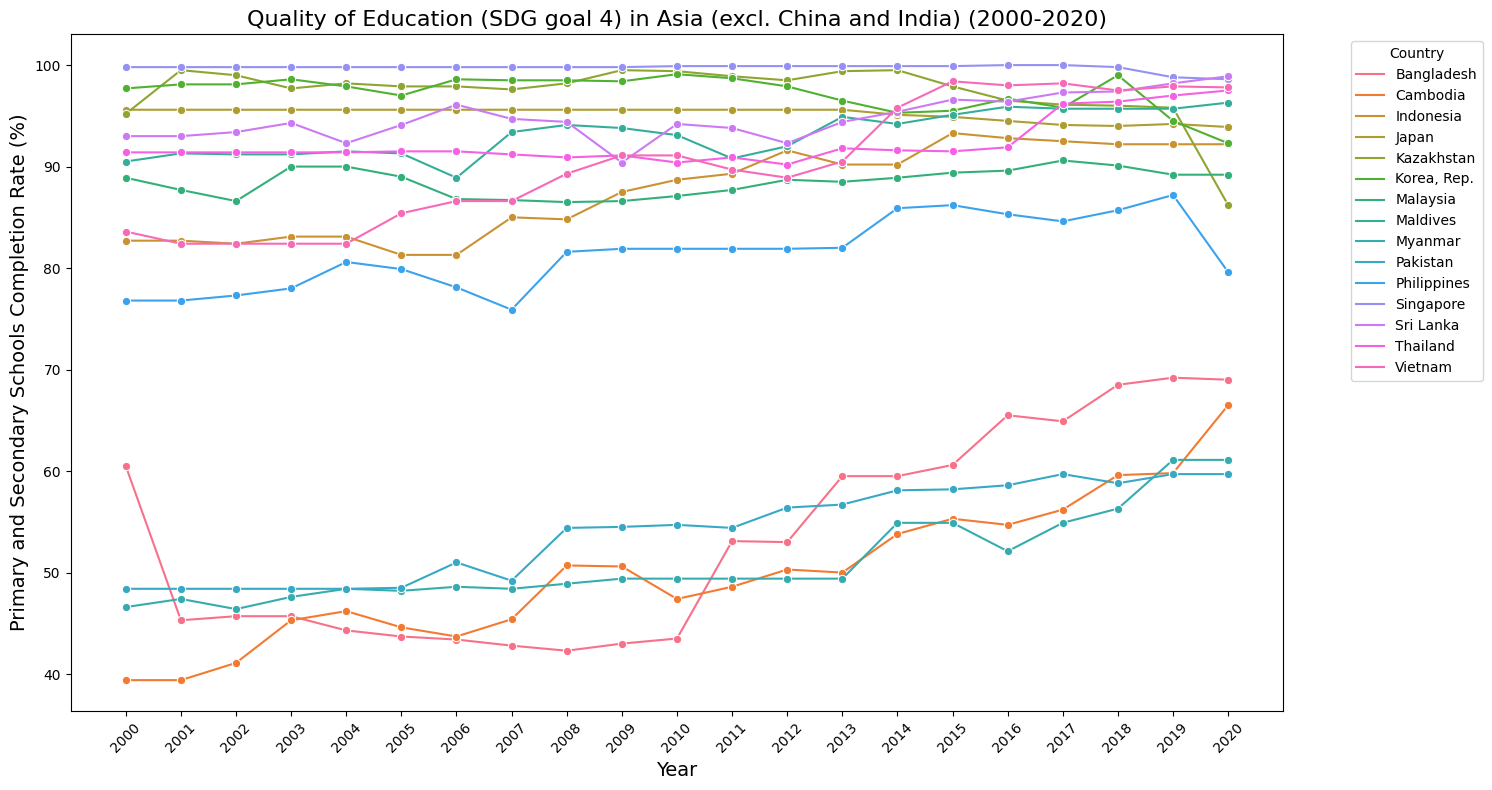

In [16]:

asiaex['year'] = asiaex['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(asiaex['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

asiaex_complete = pd.merge(all_combinations, asiaex, on=['country', 'year'], how='left')

plt.figure(figsize=(15, 8))
sns.lineplot(data=asiaex_complete, x="year", y="goal_4_score", hue="country", marker="o")
plt.title('Quality of Education (SDG goal 4) in Asia (excl. China and India) (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)


plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


Text(0, 0.5, 'Quality of Education')

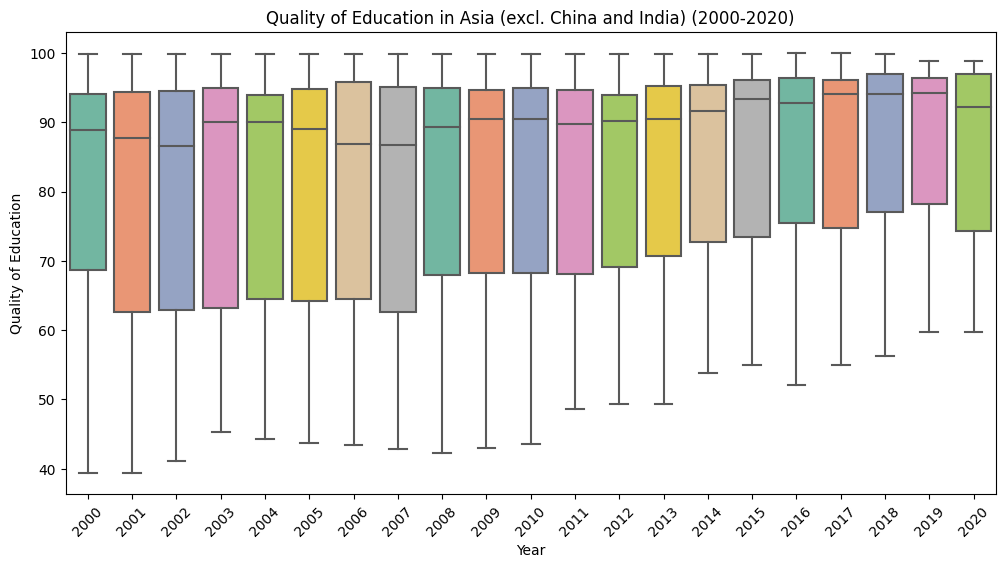

In [17]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=asiaex_complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of Education in Asia (excl. China and India) (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of Education')

In [18]:
# Filter the data for the year 2020
asiaex_2020 = asiaex[asiaex['year'] == 2020]

# Sort by 'goal_4_score' in ascending order and get the top 20 countries
asiaex_2020_sorted = asiaex_2020.sort_values(by='goal_4_score', ascending=False)

# Display the top 20 countries with the lowest goal_4_score in 2020
print(asiaex_2020_sorted[['country', 'goal_4_score']].head(20))


          country  goal_4_score
3493    Sri Lanka          98.9
3309    Singapore          98.6
4045      Vietnam          97.8
3700     Thailand          97.5
2343     Maldives          96.3
1860        Japan          93.9
1952  Korea, Rep.          92.3
1699    Indonesia          92.2
2320     Malaysia          89.2
1906   Kazakhstan          86.2
3033  Philippines          79.6
273    Bangladesh          69.0
641      Cambodia          66.5
2619      Myanmar          61.1
2918     Pakistan          59.7


In [19]:
asia_chinaindia = sdgs[sdgs['country'].isin(asia)]

/tmp/ipykernel_155/2707227254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_chinaindia['year'] = asia_chinaindia['year'].astype(int)


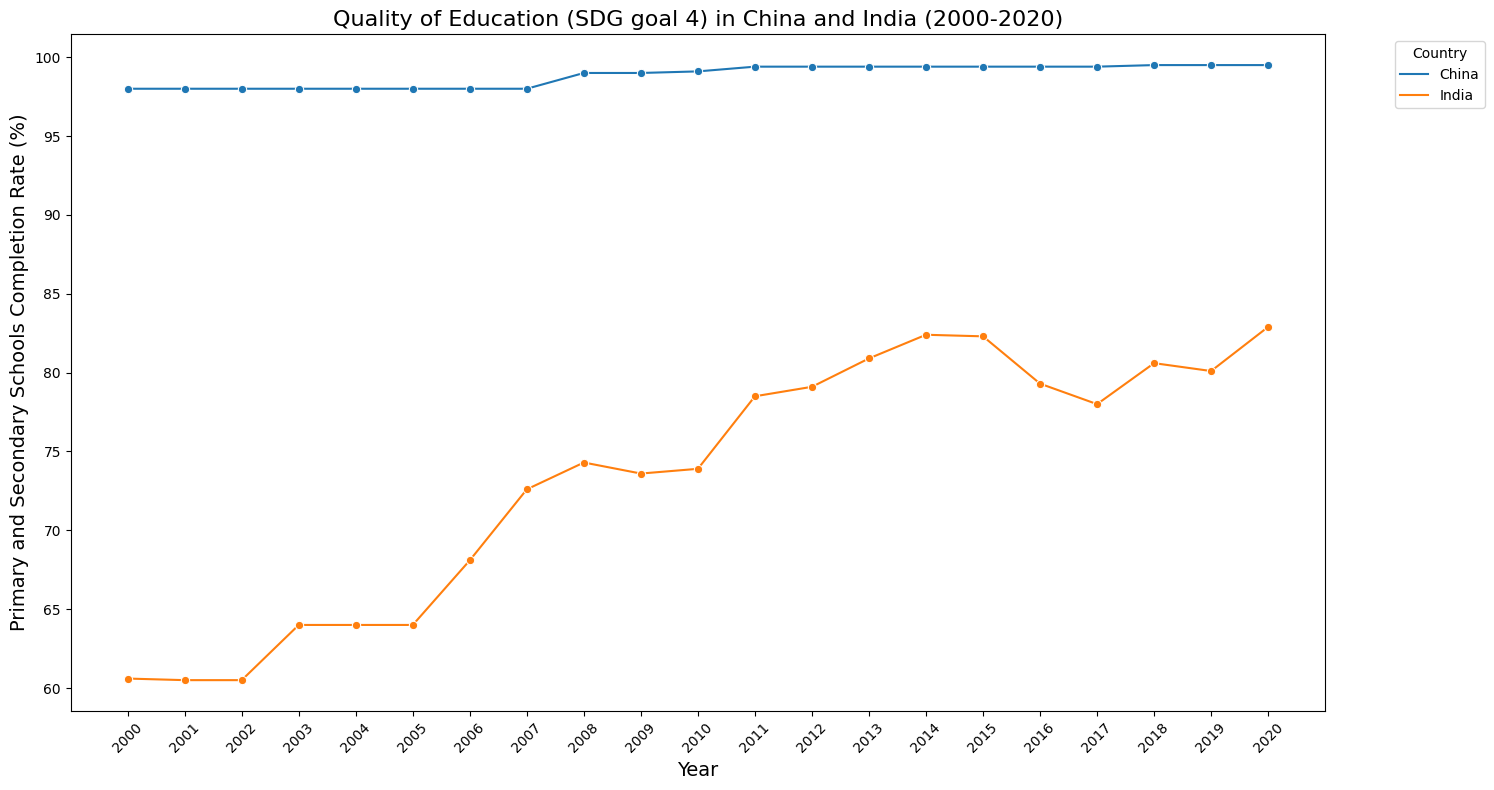

In [20]:
# Ensure 'year' is an integer type (if needed)
asia_chinaindia['year'] = asia_chinaindia['year'].astype(int)

# Create a DataFrame with all combinations of countries and years (2000 to 2020)
all_combinations = pd.DataFrame(itertools.product(asia_chinaindia['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
asiaex_complete = pd.merge(all_combinations, asia_chinaindia, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=asiaex_complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education (SDG goal 4) in China and India (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
#europe

In [22]:
europe = sdgs[sdgs['country'].isin(europe)]
europe

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
23,ALB,Albania,2000,65.9,96.4,47.0,73.6,81.7,36.7,68.8,...,61.2,17.6,84.4,74.8,84.3,90.0,35.2,66.7,66.1,60.0
24,ALB,Albania,2001,65.9,96.4,46.2,74.7,82.8,37.3,69.0,...,61.5,17.6,84.4,74.6,84.4,89.9,36.0,66.5,65.4,60.0
25,ALB,Albania,2002,65.7,96.4,45.4,74.6,82.8,37.4,69.3,...,61.8,17.6,84.4,75.2,83.9,89.4,35.5,66.4,65.4,59.1
26,ALB,Albania,2003,65.7,96.4,43.7,74.2,81.2,37.5,69.6,...,62.3,17.6,84.4,75.0,83.8,88.9,37.3,66.3,65.8,59.5
27,ALB,Albania,2004,66.2,96.4,44.1,75.0,80.8,38.0,69.9,...,62.7,17.7,84.4,75.5,83.1,89.0,38.2,69.6,65.7,60.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,GBR,United Kingdom,2016,80.5,99.9,68.6,92.4,99.1,80.1,94.4,...,83.1,88.9,72.5,94.4,54.5,66.6,72.3,86.1,82.7,60.4
3904,GBR,United Kingdom,2017,80.9,99.0,68.8,93.3,99.7,81.8,94.4,...,82.9,89.0,71.2,94.0,54.5,69.2,72.7,86.1,85.3,60.6
3905,GBR,United Kingdom,2018,80.9,99.0,68.1,93.7,99.5,82.0,94.4,...,83.2,90.9,69.0,93.3,54.2,70.0,73.7,86.2,84.2,60.4
3906,GBR,United Kingdom,2019,81.0,99.0,68.5,94.0,99.2,82.2,94.4,...,82.4,91.2,68.4,93.7,54.2,70.4,76.0,86.2,82.3,60.7


/tmp/ipykernel_155/488419318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe['year'] = europe['year'].astype(int)


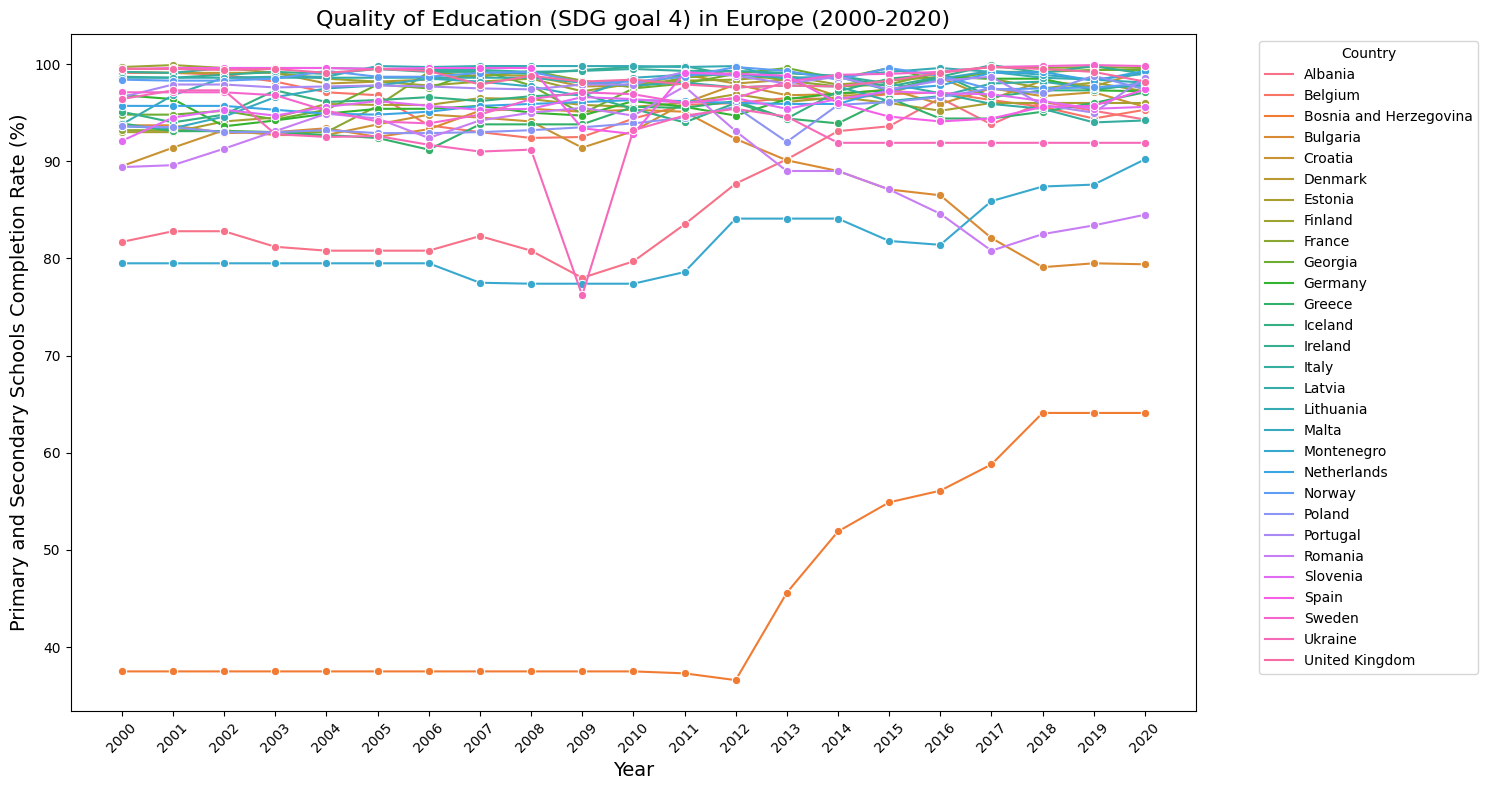

In [23]:
europe['year'] = europe['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(europe['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
euro_complete = pd.merge(all_combinations, europe, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=euro_complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education (SDG goal 4) in Europe (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()



Text(0, 0.5, 'Quality of Education')

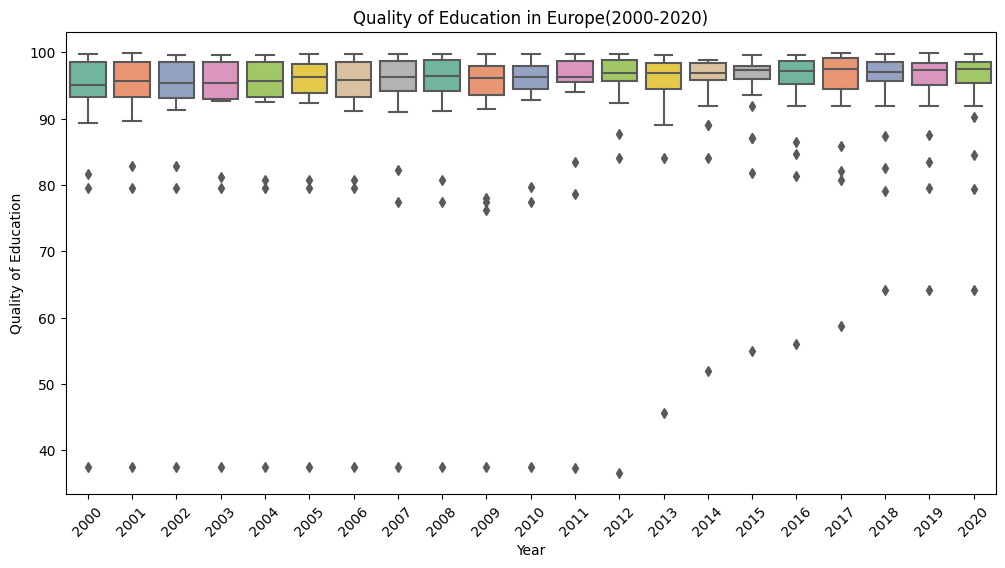

In [24]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=euro_complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of Education in Europe(2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of Education')

In [25]:
euro = europe[europe['year'] == 2020]
sorted_data = euro.sort_values(by='goal_4_score', ascending=False)
print(sorted_data[['country', 'goal_4_score']].head(20))


             country  goal_4_score
3585          Sweden          99.8
1331          France          99.6
1400         Georgia          99.4
2688     Netherlands          99.3
1032         Denmark          99.3
1768         Ireland          99.0
2389           Malta          99.0
3079        Portugal          98.6
3907  United Kingdom          98.2
2159       Lithuania          98.1
1653         Iceland          98.1
2826          Norway          98.0
2067          Latvia          97.8
3056          Poland          97.4
3470           Spain          97.4
1423         Germany          97.2
1308         Finland          97.2
1469          Greece          97.1
1216         Estonia          96.0
3355        Slovenia          95.6


In [26]:
euro20  =['Sweden', 'France', 'Georgia', 'Netherlands', 'Denmark', 'Ireland', 'Malta', 
 'Portugal', 'United Kingdom', 'Lithuania', 'Iceland', 'Norway', 'Latvia', 
 'Poland', 'Spain', 'Germany', 'Finland', 'Greece', 'Estonia', 'Slovenia']
euro20 = sdgs[sdgs['country'].isin(euro20)]

/tmp/ipykernel_155/884833259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro20['year'] = euro20['year'].astype(int)


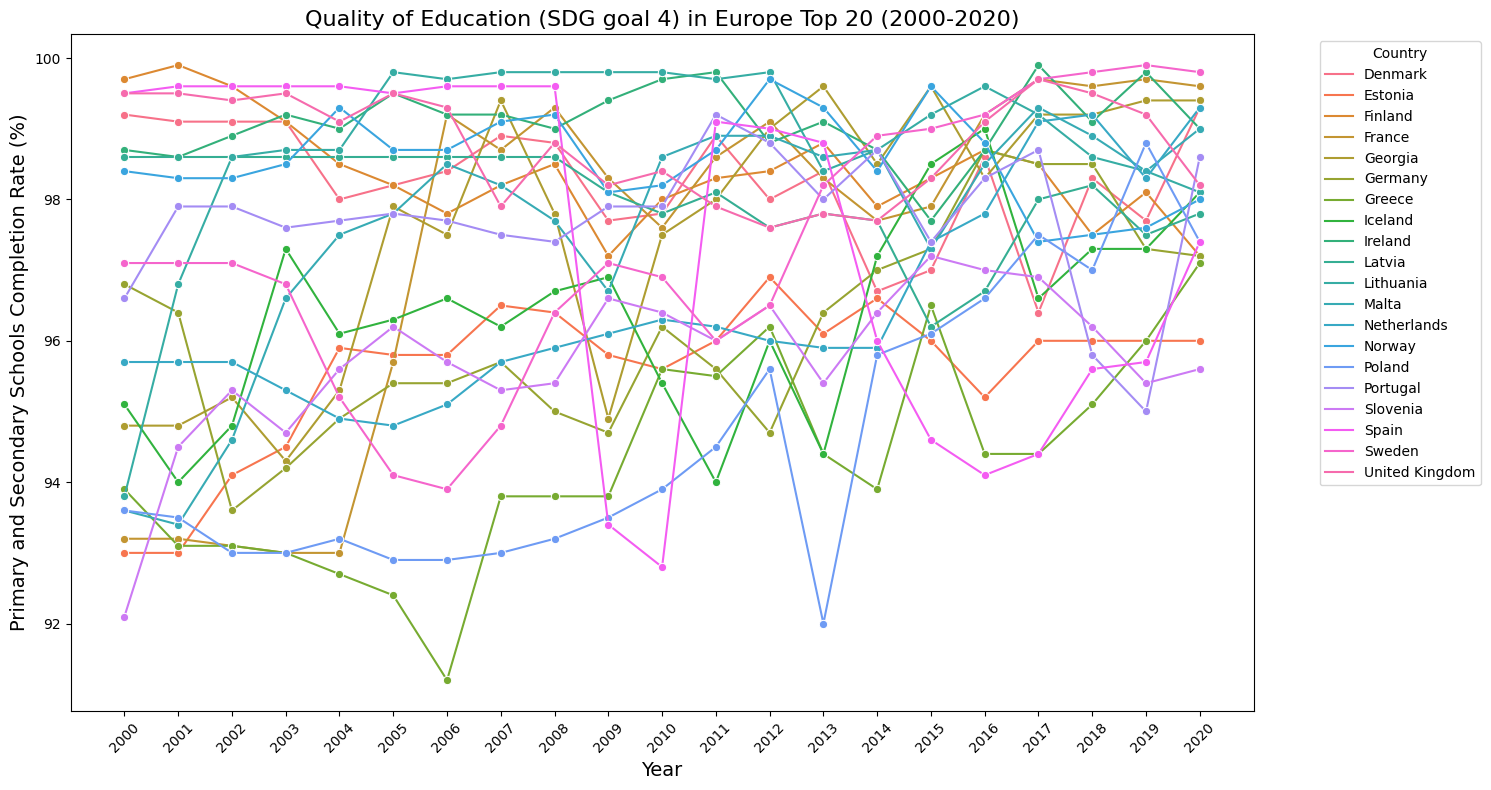

In [27]:
euro20['year'] = euro20['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(euro20['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
euro20complete = pd.merge(all_combinations, euro20, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=euro20complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education (SDG goal 4) in Europe Top 20 (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Quality of education')

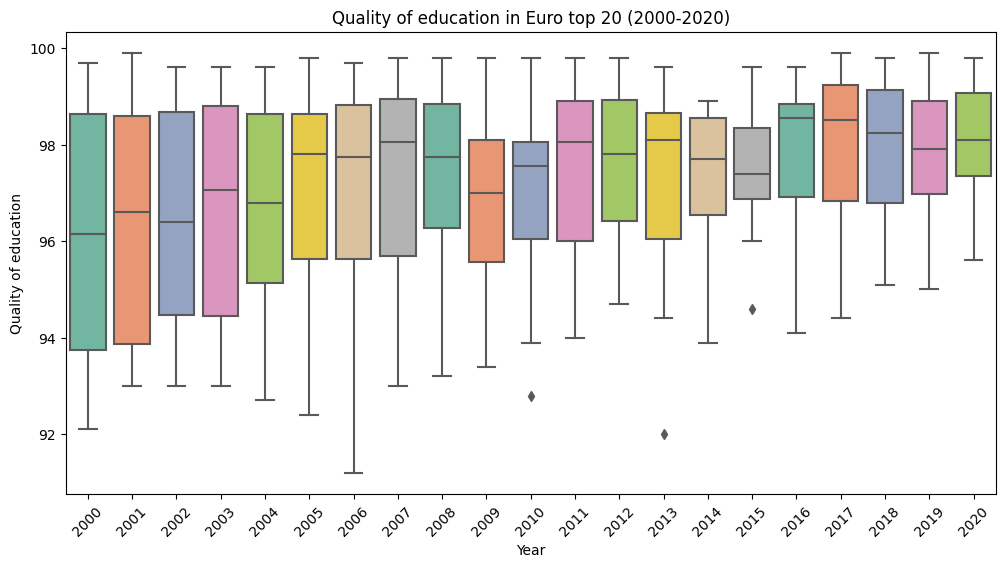

In [28]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=euro20complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of education in Euro top 20 (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of education')

In [29]:
#amrica america_excl_usa

/tmp/ipykernel_155/4164934256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america['year'] = america['year'].astype(int)


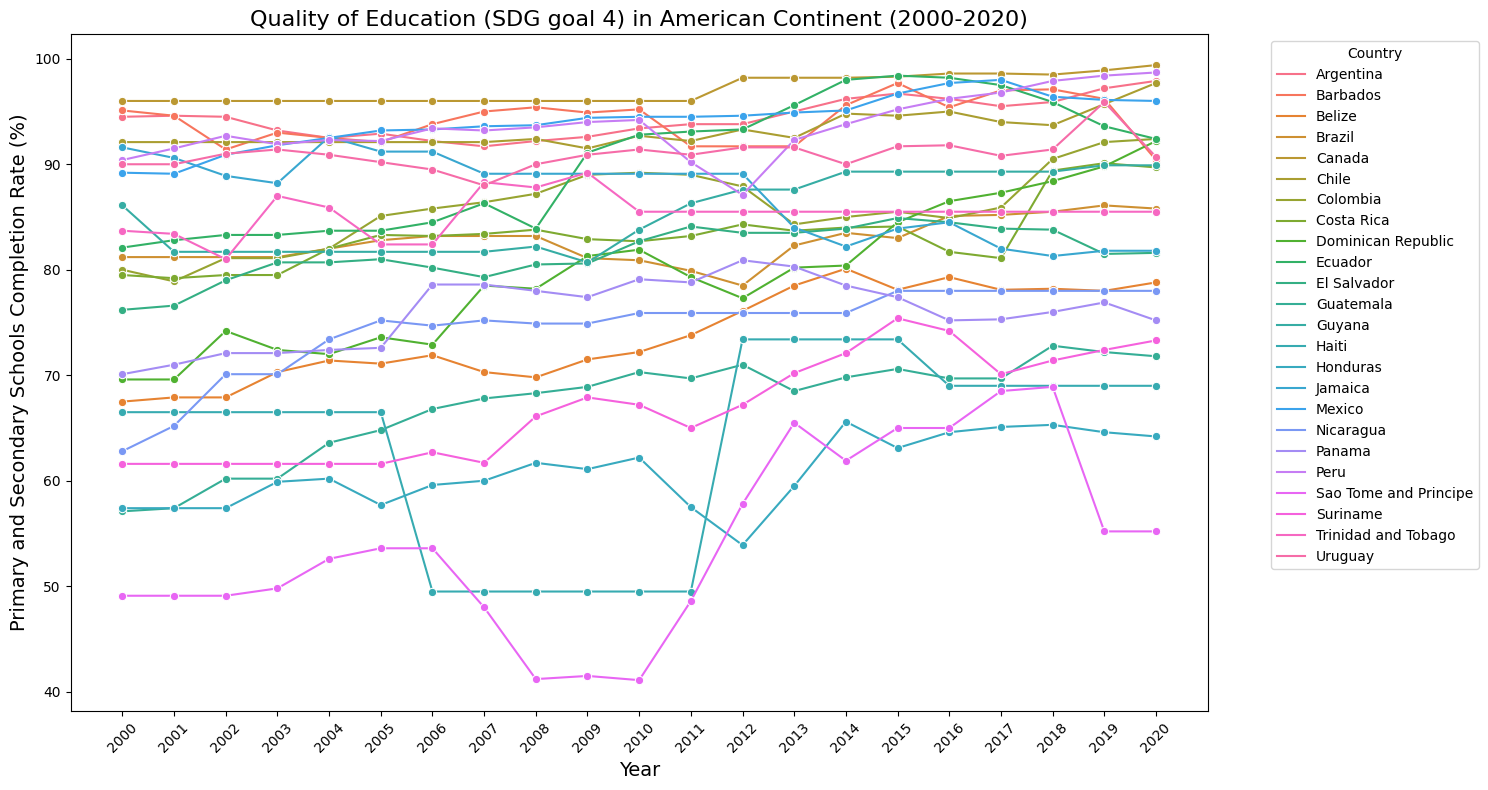

In [30]:
america = sdgs[sdgs['country'].isin(america_excl_usa)]

america['year'] = america['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(america['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
ame_complete = pd.merge(all_combinations, america, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=ame_complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education (SDG goal 4) in American Continent (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Quality of Education')

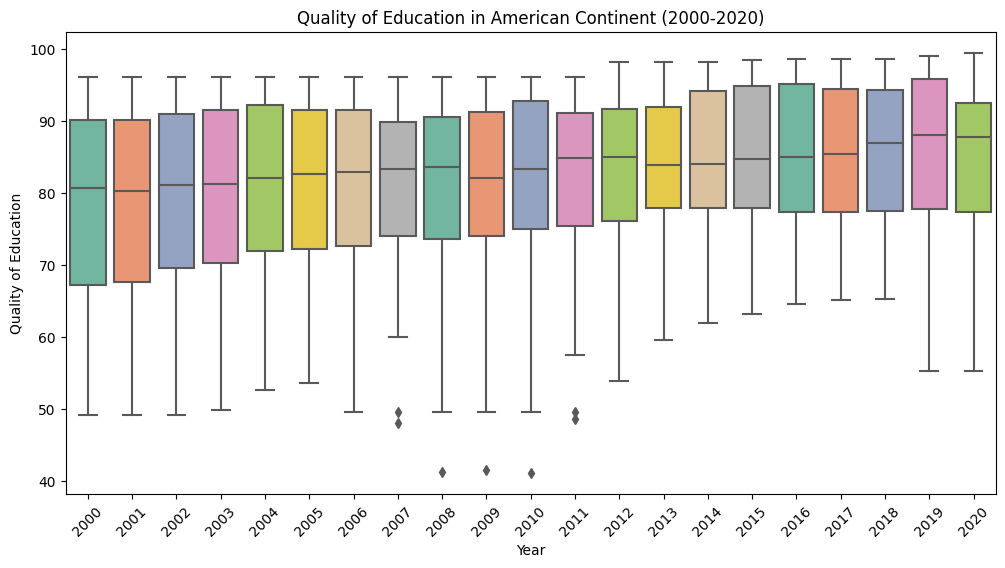

In [31]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=ame_complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of Education in American Continent (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of Education')

In [32]:
america = america[america['year'] == 2020]
sorted_data = america.sort_values(by='goal_4_score', ascending=False)
print(sorted_data[['country', 'goal_4_score']].head(20))

                  country  goal_4_score
687                Canada          99.4
3010                 Peru          98.7
112             Argentina          97.9
756                 Chile          97.7
2458               Mexico          96.0
802              Colombia          92.4
1147              Ecuador          92.4
1078   Dominican Republic          92.2
3976              Uruguay          90.7
296              Barbados          90.4
1538               Guyana          89.9
894            Costa Rica          89.7
503                Brazil          85.8
3746  Trinidad and Tobago          85.5
1837              Jamaica          81.8
1193          El Salvador          81.6
365                Belize          78.8
2734            Nicaragua          78.0
2941               Panama          75.2
3562             Suriname          73.3


/tmp/ipykernel_155/704710351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['year'] = usa['year'].astype(int)


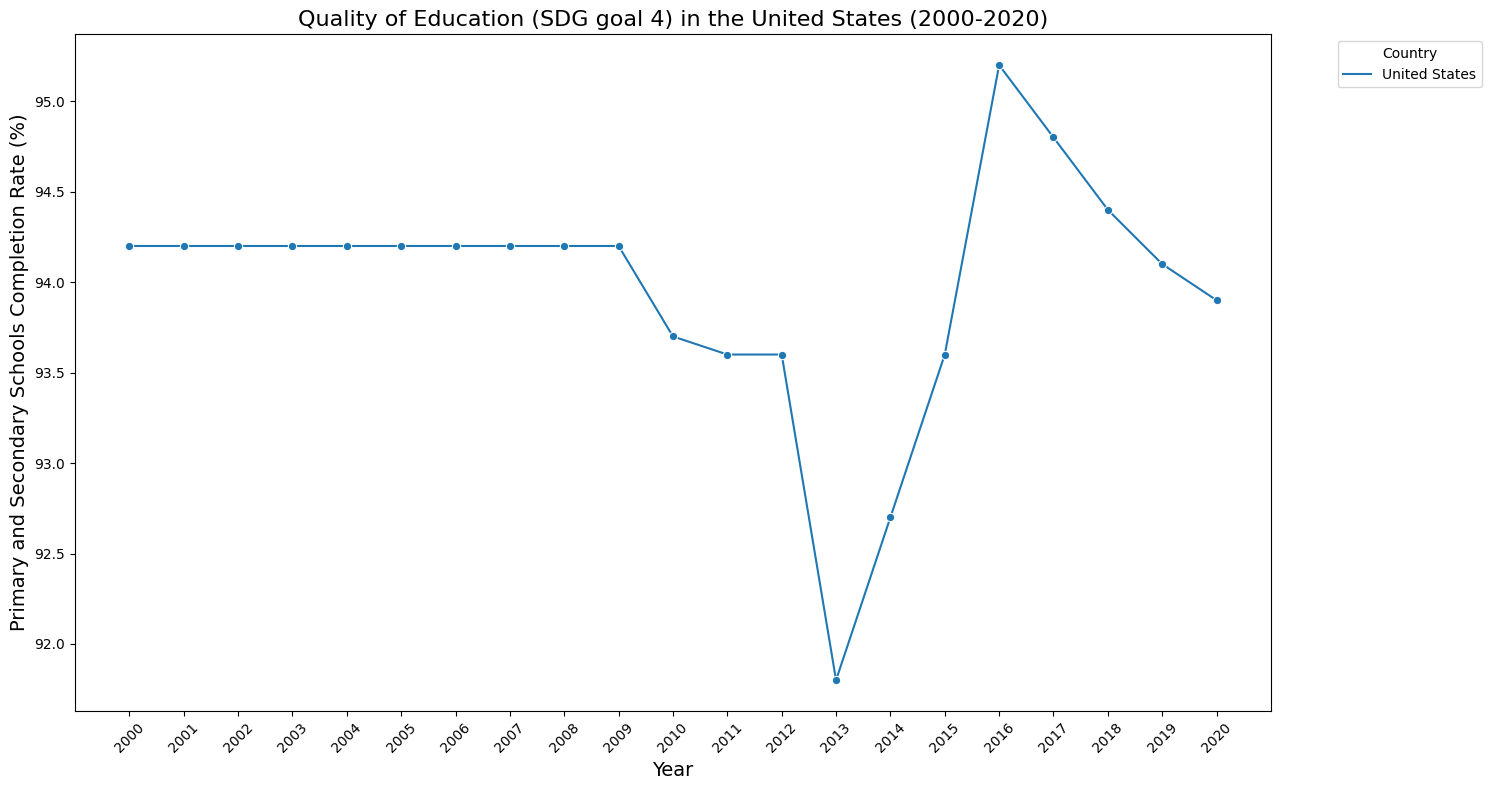

In [33]:
usa = sdgs[sdgs['country'].isin(usa)]

usa['year'] = usa['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(usa['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
complete = pd.merge(all_combinations, usa, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education (SDG goal 4) in the United States (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
#sub_saharan_africa

/tmp/ipykernel_155/3969398749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_saharan_africa['year'] = sub_saharan_africa['year'].astype(int)


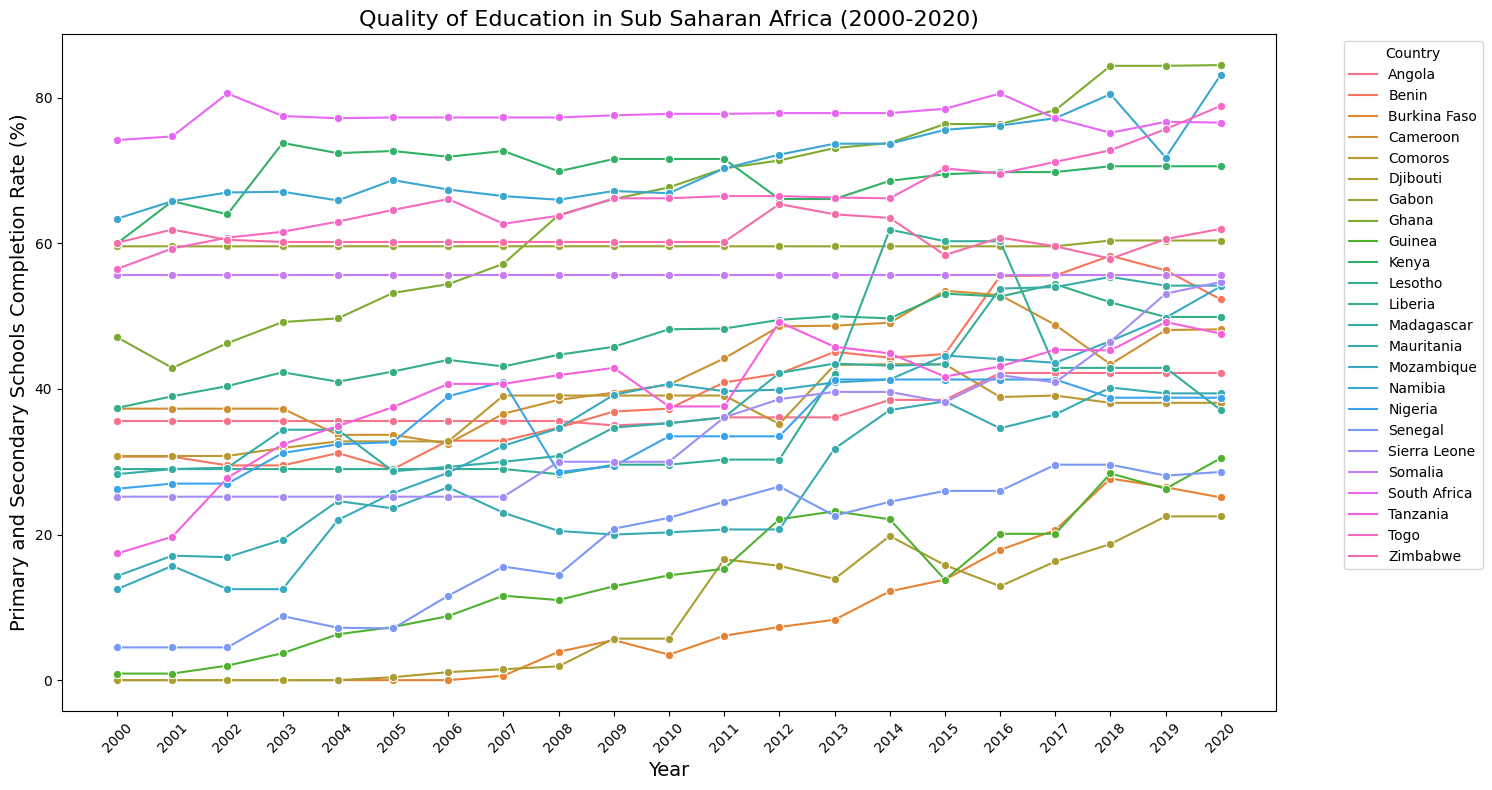

In [35]:
sub_saharan_africa = sdgs[sdgs['country'].isin(sub_saharan_africa)]

sub_saharan_africa['year'] = sub_saharan_africa['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(sub_saharan_africa['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
sahara_complete = pd.merge(all_combinations, sub_saharan_africa, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=sahara_complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education in Sub Saharan Africa (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Quality of Education')

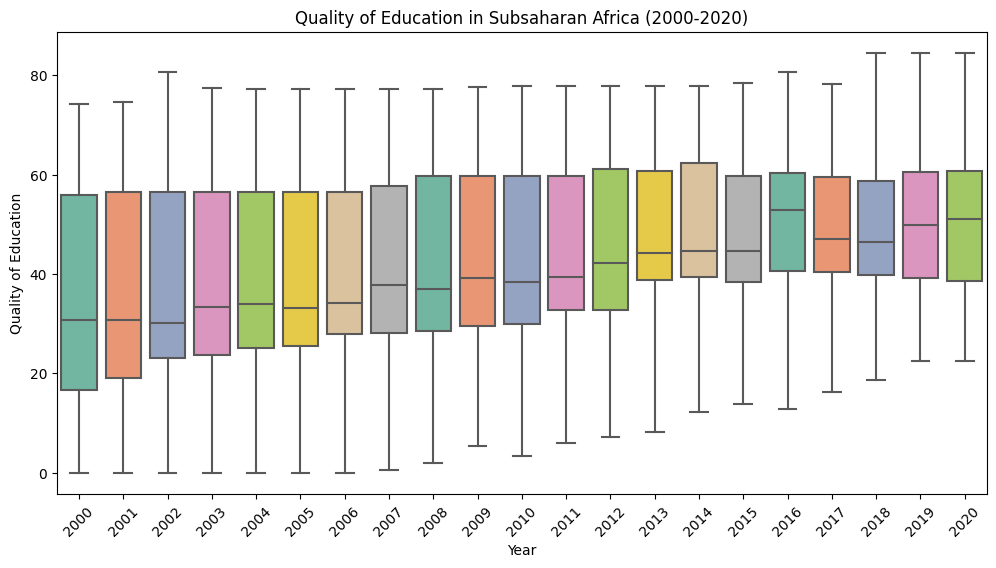

In [36]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=sahara_complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of Education in Subsaharan Africa (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of Education')

In [37]:
sub_saharan_africa = sub_saharan_africa[sub_saharan_africa['year'] == 2020]
sorted_data = sub_saharan_africa.sort_values(by='goal_4_score', ascending=False)
print(sorted_data[['country', 'goal_4_score']].head(20))

           country  goal_4_score
1446         Ghana          84.5
2642       Namibia          83.2
3723          Togo          78.9
3424  South Africa          76.6
1929         Kenya          70.6
4137      Zimbabwe          62.0
1354         Gabon          60.4
3401       Somalia          55.6
3286  Sierra Leone          54.7
2274    Madagascar          54.2
2596    Mozambique          54.1
388          Benin          52.3
2113       Lesotho          49.9
664       Cameroon          48.2
3677      Tanzania          47.6
89          Angola          42.2
2412    Mauritania          39.4
2780       Nigeria          38.8
825        Comoros          38.1
2136       Liberia          37.1


In [38]:
#MENA = middle east and north africa

/tmp/ipykernel_155/104447090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mena['year'] = sdgs['year'].astype(int)


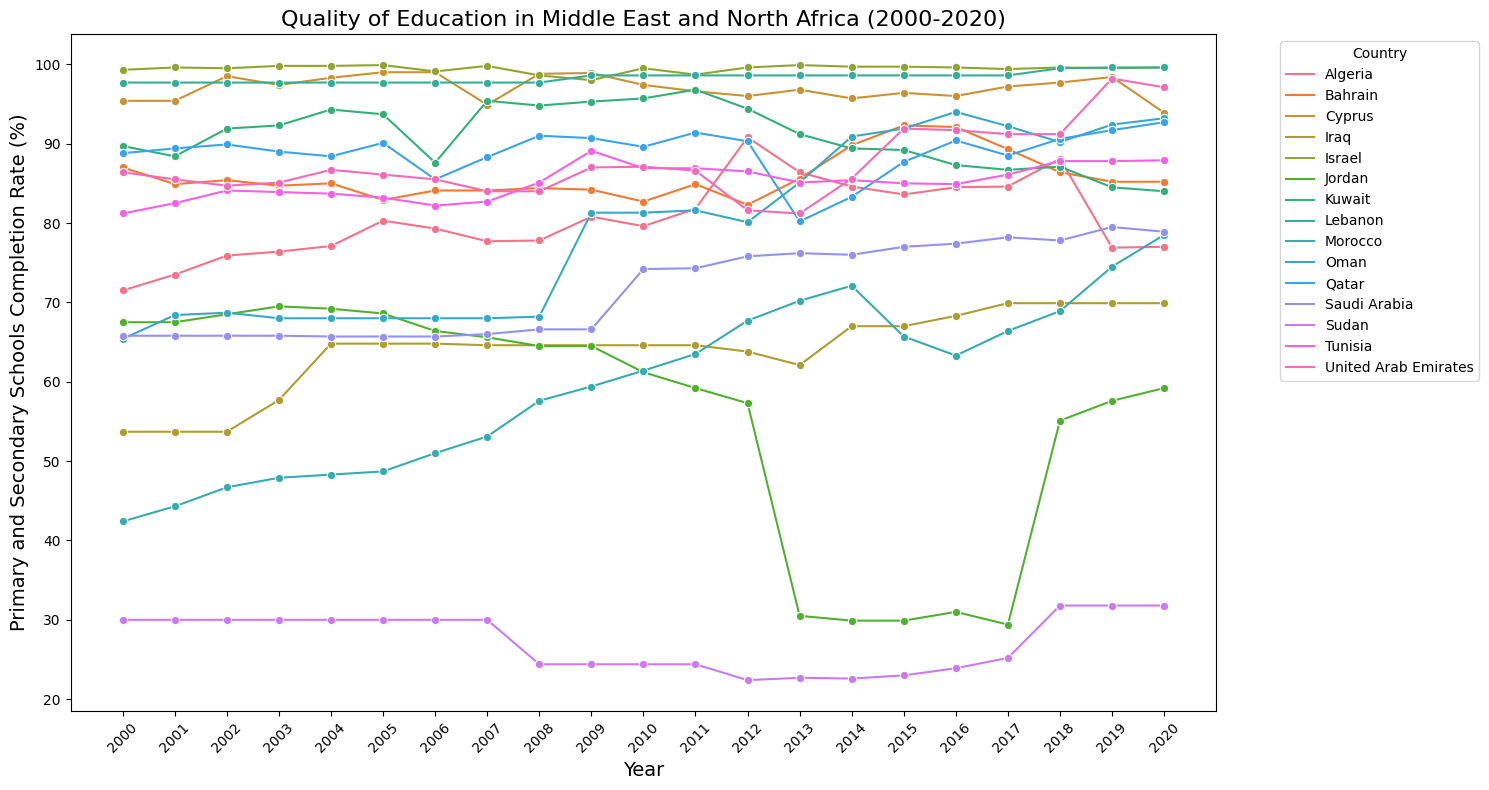

In [39]:
mena = sdgs[sdgs['country'].isin(mena)]

mena['year'] = sdgs['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(mena['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
mena_complete = pd.merge(all_combinations, mena, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=mena_complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education in Middle East and North Africa (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Quality of education')

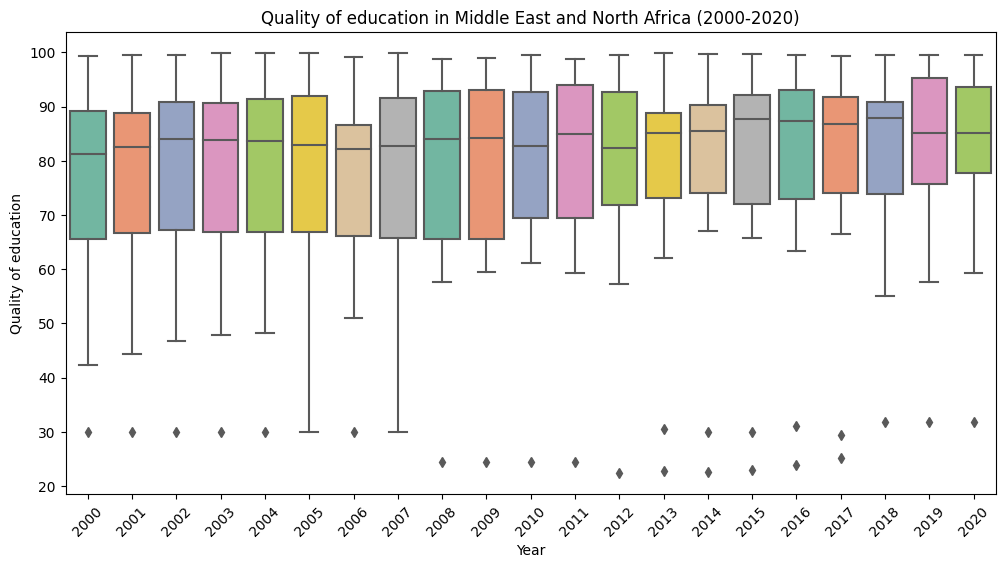

In [40]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=mena_complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of education in Middle East and North Africa (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of education')

In [41]:
mena = mena[mena['year'] == 2020]
sorted_data = mena.sort_values(by='goal_4_score', ascending=False)
print(sorted_data[['country', 'goal_4_score']].head(20))

                   country  goal_4_score
1791                Israel          99.6
2090               Lebanon          99.6
3884  United Arab Emirates          97.1
986                 Cyprus          93.9
2895                  Oman          93.2
3102                 Qatar          92.7
3769               Tunisia          87.9
250                Bahrain          85.2
1975                Kuwait          84.0
3217          Saudi Arabia          78.9
2573               Morocco          78.5
66                 Algeria          77.0
1745                  Iraq          69.9
1883                Jordan          59.2
3539                 Sudan          31.8


In [42]:
mena

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
66,DZA,Algeria,2020,71.3,97.1,57.6,77.0,77.0,49.8,58.0,...,66.8,49.9,97.0,67.1,89.2,88.7,64.8,62.0,66.2,77.8
250,BHR,Bahrain,2020,61.0,0.0,66.3,86.8,85.2,51.9,67.9,...,81.7,59.2,0.0,65.7,67.4,14.6,47.9,46.0,64.3,38.5
986,CYP,Cyprus,2020,72.7,99.9,54.5,91.8,93.9,71.2,67.9,...,73.7,75.1,85.5,81.1,48.2,68.6,50.1,78.6,76.7,45.9
1745,IRQ,Iraq,2020,63.0,0.0,52.4,60.9,69.9,42.9,62.6,...,58.3,34.6,91.5,57.2,86.2,86.0,69.5,40.9,64.0,67.0
1791,ISR,Israel,2020,73.9,98.5,56.1,95.6,99.6,75.3,68.2,...,83.6,95.2,71.6,83.4,67.5,66.9,37.5,49.4,71.9,64.5
1883,JOR,Jordan,2020,69.9,98.6,56.5,73.7,59.2,39.9,55.2,...,62.2,58.2,77.0,77.1,89.1,91.4,90.4,55.1,70.5,61.3
1975,KWT,Kuwait,2020,63.4,0.0,67.6,85.6,84.0,53.3,55.0,...,76.3,61.5,0.0,65.8,62.0,32.4,47.1,52.8,75.4,63.6
2090,LBN,Lebanon,2020,68.0,98.8,52.4,74.7,99.6,44.5,66.3,...,58.7,69.8,84.4,69.0,81.6,87.0,65.7,57.2,56.4,28.8
2573,MAR,Morocco,2020,70.5,92.4,61.6,73.3,78.5,43.6,63.5,...,67.4,52.6,53.9,75.4,90.9,94.5,71.8,77.3,65.2,67.1
2895,OMN,Oman,2020,67.8,0.0,58.0,83.5,93.2,36.4,50.5,...,80.6,62.8,0.0,83.3,73.7,37.3,77.9,62.7,76.8,73.0


In [43]:
#oceania

/tmp/ipykernel_155/3086678636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oceania['year'] = sdgs['year'].astype(int)


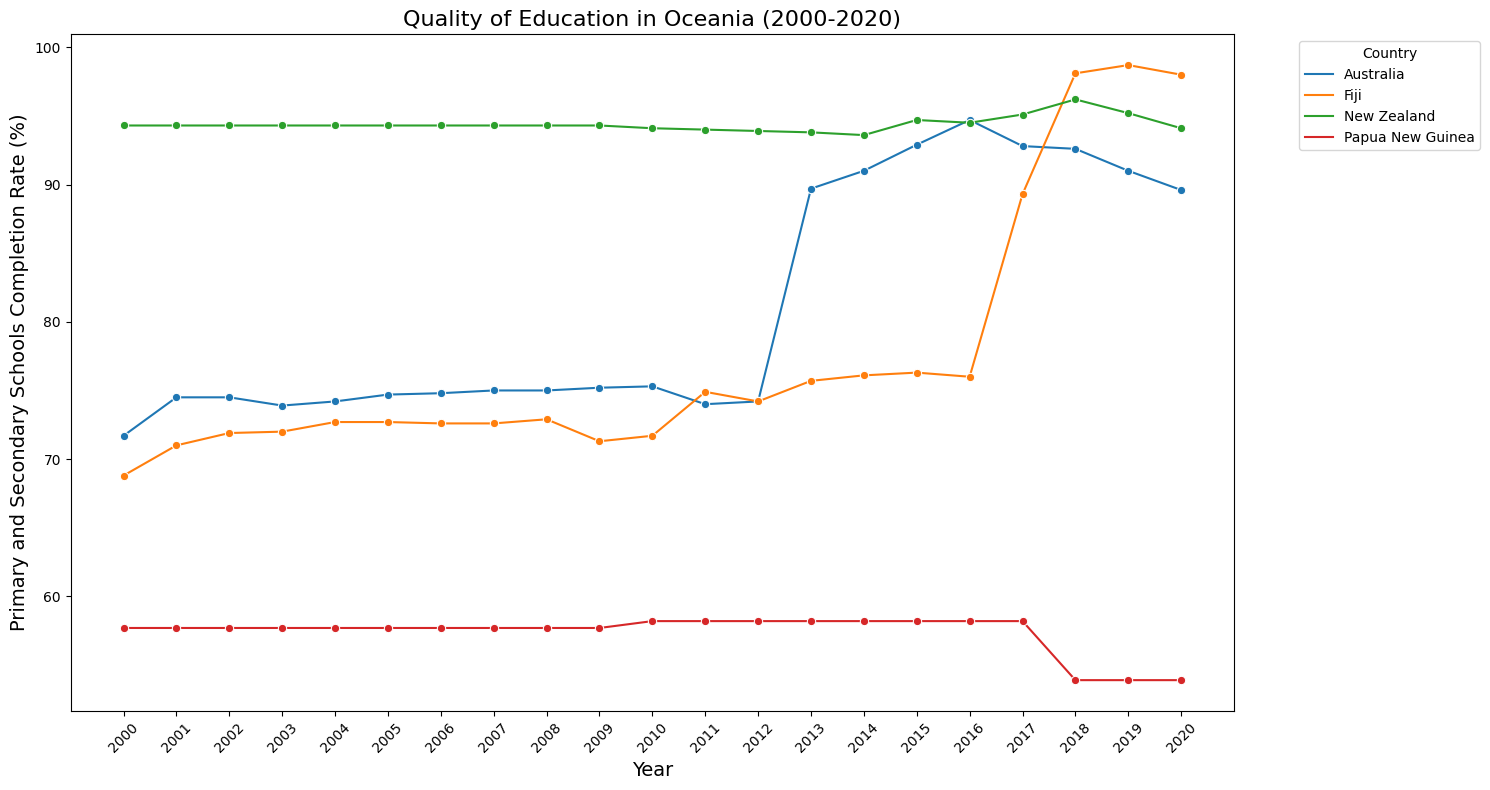

In [44]:
oceania = sdgs[sdgs['country'].isin(oceania)]

oceania['year'] = sdgs['year'].astype(int)

all_combinations = pd.DataFrame(itertools.product(oceania['country'].unique(), range(2000, 2021)), columns=['country', 'year'])

# Merge this with your original data to ensure no missing years
complete = pd.merge(all_combinations, oceania, on=['country', 'year'], how='left')

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=complete, x="year", y="goal_4_score", hue="country", marker="o")

# Add title and labels
plt.title('Quality of Education in Oceania (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Primary and Secondary Schools Completion Rate (%)', fontsize=14)

# Set x-axis ticks to be every year from 2000 to 2020
plt.xticks(range(2000, 2021), rotation=45)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Quality of Education')

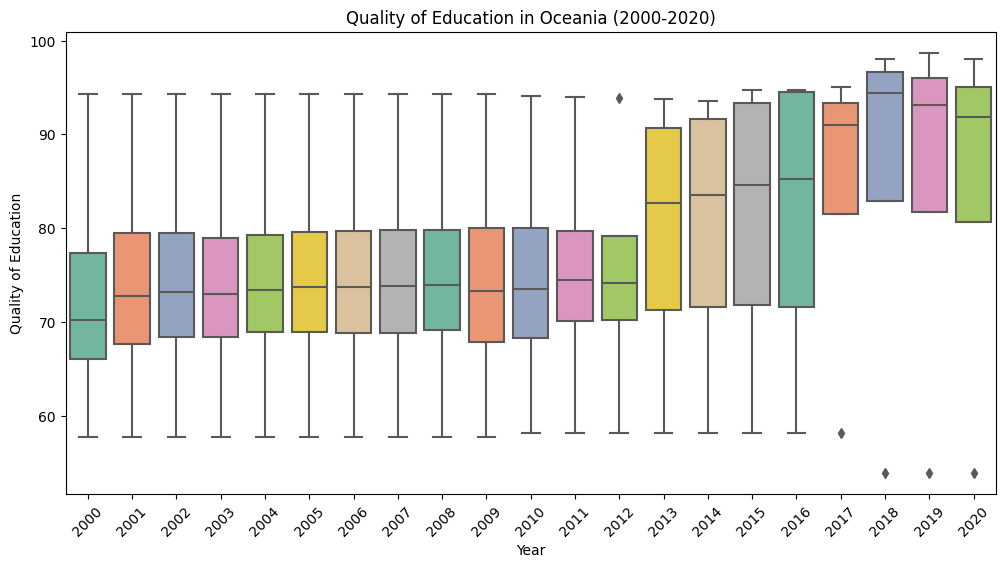

In [45]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='goal_4_score', data=complete, palette='Set2')
plt.xticks(rotation=45)
plt.title('Quality of Education in Oceania (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Quality of Education')

In [46]:
oceania = oceania[oceania['year'] == 2000]
sorted_data = oceania.sort_values(by='goal_4_score', ascending=False)
print(sorted_data[['country', 'goal_4_score']].head(20))

               country  goal_4_score
2691       New Zealand          94.3
138          Australia          71.7
1265              Fiji          68.8
2944  Papua New Guinea          57.7


In [47]:
oceania = sdgs[sdgs['country'].isin(oceania)]

In [48]:
# List of Oceania countries
oceania_countries = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 
                     'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 
                     'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# Now filter the original DataFrame
oceania_df = sdgs[sdgs['country'].isin(oceania_countries)]
print(sdgs.columns)  # Check the exact column name

sdgs.columns = sdgs.columns.str.strip()  # Strips leading/trailing spaces
sdgs['country'] = sdgs['country'].str.strip()  # Strips leading/trailing spaces
print(sdgs['country'].unique())  # Look at all country names in the DataFrame


Index(['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score',
       'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
       'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score',
       'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score',
       'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score'],
      dtype='object')
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'East and South Asia'
 'Eastern Europe

/tmp/ipykernel_155/1985465942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdgs['country'] = sdgs['country'].str.strip()  # Strips leading/trailing spaces


In [49]:
# Strip any extra spaces in the 'country' column
sdgs.loc[:, 'country'] = sdgs['country'].str.strip()

# Ensure the 'country' column is of type string
sdgs.loc[:, 'country'] = sdgs['country'].astype(str)


/tmp/ipykernel_155/200146946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdgs.loc[:, 'country'] = sdgs['country'].str.strip()
/tmp/ipykernel_155/200146946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdgs.loc[:, 'country'] = sdgs['country'].astype(str)


In [50]:
# List of Oceania countries
oceania_countries = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 
                     'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 
                     'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# Strip extra spaces in the 'country' column (use .loc to avoid SettingWithCopyWarning)
sdgs.loc[:, 'country'] = sdgs['country'].str.strip()

# Ensure the 'country' column is of type string
sdgs.loc[:, 'country'] = sdgs['country'].astype(str)

# Filter the DataFrame to include only Oceania countries
oceania_df = sdgs[sdgs['country'].isin(oceania_countries)]

# Display the filtered DataFrame (optional)
print(oceania_df)


     country_code           country  year  sdg_index_score  goal_1_score  \
138           AUS         Australia  2000             70.7          99.7   
139           AUS         Australia  2001             70.9          99.7   
140           AUS         Australia  2002             71.4          99.7   
141           AUS         Australia  2003             70.9          99.7   
142           AUS         Australia  2004             71.4          99.7   
...           ...               ...   ...              ...           ...   
2960          PNG  Papua New Guinea  2016             53.1          30.4   
2961          PNG  Papua New Guinea  2017             53.6          30.8   
2962          PNG  Papua New Guinea  2018             53.6          30.3   
2963          PNG  Papua New Guinea  2019             53.6          30.9   
2964          PNG  Papua New Guinea  2020             53.6          29.6   

      goal_2_score  goal_3_score  goal_4_score  goal_5_score  goal_6_score  \
138      

/tmp/ipykernel_155/3135468974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdgs.loc[:, 'country'] = sdgs['country'].str.strip()
/tmp/ipykernel_155/3135468974.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdgs.loc[:, 'country'] = sdgs['country'].astype(str)


In [51]:
oceania_df

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
138,AUS,Australia,2000,70.7,99.7,63.3,90.5,71.7,72.2,93.8,...,85.6,77.6,80.9,82.2,47.0,3.4,52.7,59.3,85.1,66.2
139,AUS,Australia,2001,70.9,99.7,62.9,91.0,74.5,72.2,93.8,...,85.4,78.5,80.9,82.2,47.5,3.1,51.4,59.2,85.2,66.2
140,AUS,Australia,2002,71.4,99.7,63.4,91.2,74.5,73.5,93.8,...,85.6,79.1,80.9,82.2,46.5,3.1,56.5,60.1,85.1,66.6
141,AUS,Australia,2003,70.9,99.7,57.3,91.7,73.9,73.6,93.8,...,85.8,79.1,80.9,82.3,45.8,2.8,57.1,60.1,85.2,66.5
142,AUS,Australia,2004,71.4,99.7,63.0,91.8,74.2,73.3,93.8,...,86.0,79.5,81.5,82.4,45.1,2.0,59.4,60.1,85.3,66.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,PNG,Papua New Guinea,2016,53.1,30.4,34.1,41.9,58.2,48.0,41.4,...,77.1,8.2,43.7,73.9,96.7,95.5,63.2,65.0,53.9,35.1
2961,PNG,Papua New Guinea,2017,53.6,30.8,34.1,41.4,58.2,47.6,41.7,...,77.1,8.7,43.7,73.6,96.7,95.7,68.3,64.8,54.4,37.0
2962,PNG,Papua New Guinea,2018,53.6,30.3,33.6,42.1,53.9,47.9,41.9,...,77.0,6.5,43.7,73.1,96.5,95.3,72.8,64.3,53.8,40.7
2963,PNG,Papua New Guinea,2019,53.6,30.9,33.6,42.8,53.9,48.2,42.2,...,77.1,7.9,43.7,72.6,96.5,95.2,72.1,64.0,54.3,38.8
